In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Performance of ResTP-GSR across all metrics

In [12]:
df_fold_0 = pd.read_csv('evaluation/soap/fold_0.csv')
df_fold_1 = pd.read_csv('evaluation/soap/fold_1.csv')
df_fold_2 = pd.read_csv('evaluation/soap/fold_2.csv')

# Calculate the mean and standard deviation
df_all = pd.concat([df_fold_0, df_fold_1, df_fold_2])
df_average = df_all.groupby(level=0).mean()
df_std = df_all.groupby(level=0).std()

# Ensure column names match when using error bars
df_std.columns = df_average.columns  # Align std columns with mean columns

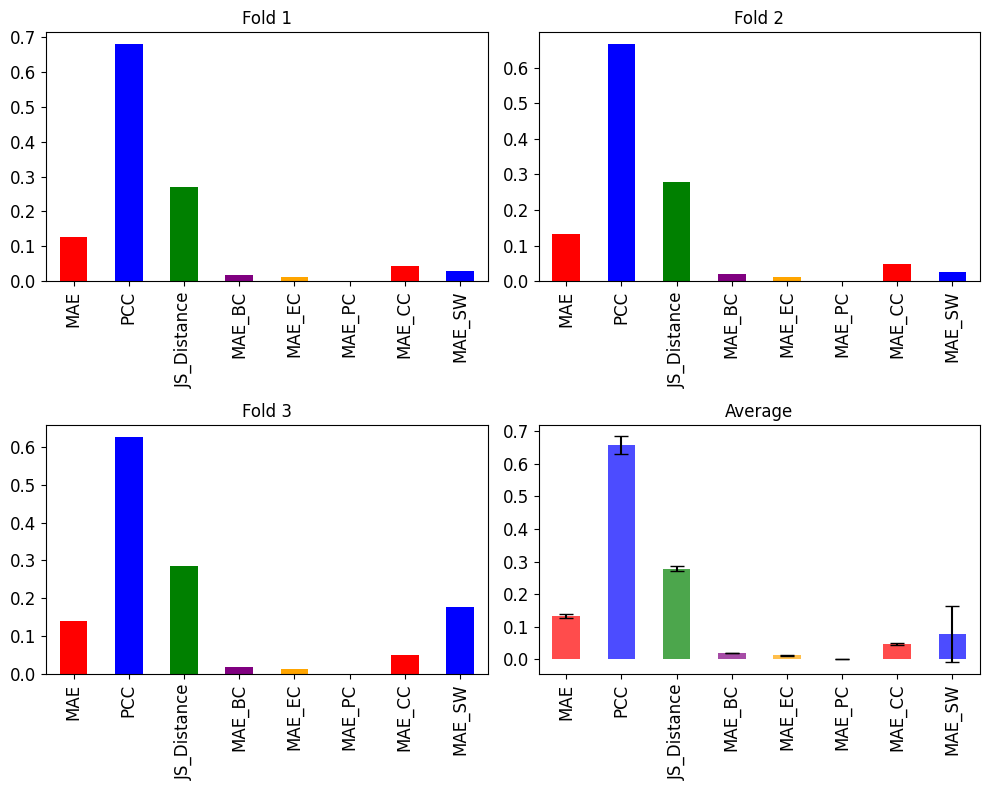

In [13]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot Fold 1
df_fold_0.iloc[0].plot(ax=axes[0, 0], title='Fold 1', kind='bar', color=colors, fontsize=12)

# Plot Fold 2
df_fold_1.iloc[0].plot(ax=axes[0, 1], title='Fold 2', kind='bar', color=colors, fontsize=12)

# Plot Fold 3
df_fold_2.iloc[0].plot(ax=axes[1, 0], title='Fold 3', kind='bar', color=colors, fontsize=12)

# Plot Average with Standard Deviation Error Bars
df_average.iloc[0].plot(ax=axes[1, 1], title='Average', kind='bar', color=colors, fontsize=12, 
                        yerr=df_std.iloc[0].values, capsize=5, alpha=0.7)

plt.tight_layout()
plt.show()

## Plotting the RAM usage

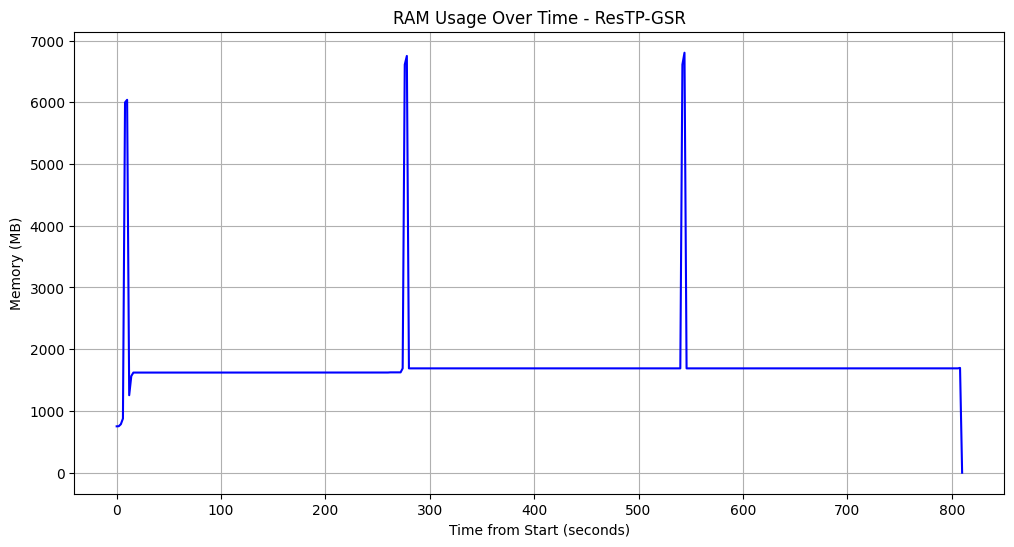

In [27]:
ram_df = pd.read_csv('memory_usage_log_2.csv')
ram_df['timestamp'] = pd.to_datetime(ram_df['timestamp'])
ram_df.set_index('timestamp', inplace=True)

# Calculate the time from start in seconds
ram_df['time_from_start'] = (ram_df.index - ram_df.index[0]).total_seconds()

plt.figure(figsize=(12, 6))
plt.plot(ram_df['time_from_start'], ram_df['memory_MB'], color='blue')
plt.title('RAM Usage Over Time - ResTP-GSR')
plt.xlabel('Time from Start (seconds)')
plt.ylabel('Memory (MB)')
plt.grid(True)
plt.show()

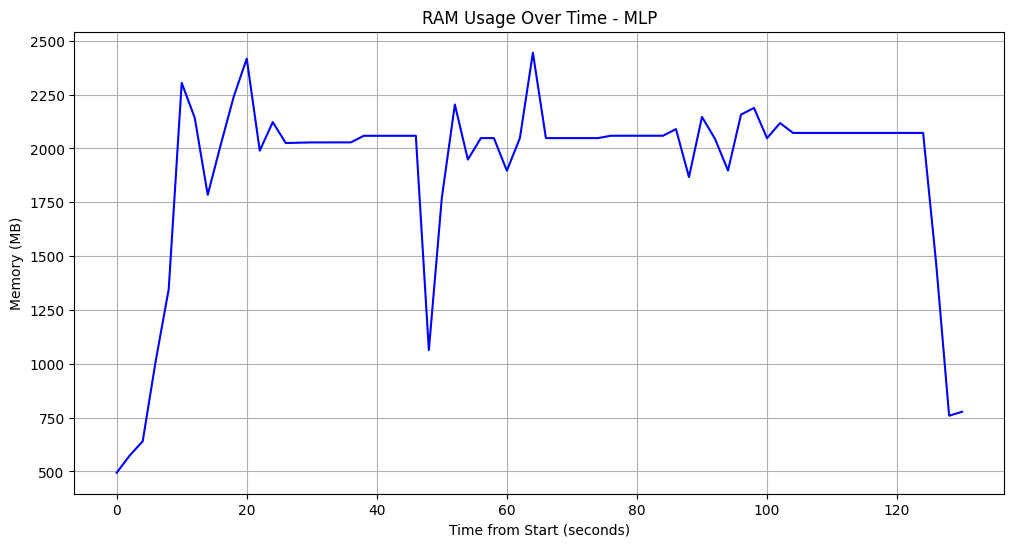

In [28]:
ram_df = pd.read_csv('memory_usage_log_mlp.csv')
ram_df['timestamp'] = pd.to_datetime(ram_df['timestamp'])
ram_df.set_index('timestamp', inplace=True)

# Calculate the time from start in seconds
ram_df['time_from_start'] = (ram_df.index - ram_df.index[0]).total_seconds()

plt.figure(figsize=(12, 6))
plt.plot(ram_df['time_from_start'], ram_df['memory_MB'], color='blue')
plt.title('RAM Usage Over Time - MLP')
plt.xlabel('Time from Start (seconds)')
plt.ylabel('Memory (MB)')
plt.grid(True)
plt.show()

In [ ]:
ram_df = pd.read_csv('memory_usage_log_stp_gsr.csv')
ram_df['timestamp'] = pd.to_datetime(ram_df['timestamp'])
ram_df.set_index('timestamp', inplace=True)

# Calculate the time from start in seconds
ram_df['time_from_start'] = (ram_df.index - ram_df.index[0]).total_seconds()

plt.figure(figsize=(12, 6))
plt.plot(ram_df['time_from_start'], ram_df['memory_MB'], color='blue')
plt.title('RAM Usage Over Time - STP-GSR')
plt.xlabel('Time from Start (seconds)')
plt.ylabel('Memory (MB)')
plt.grid(True)
plt.show()

## Comparing the performance of ResTP-GSR, STP-GSR and the naive MLP

In [ ]:
import os

def get_average_from_directory(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    df_list = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
    df_all = pd.concat(df_list)
    
    df_average = df_all.groupby(level=0).mean()
    
    return df_average

df_average_mlp = get_average_from_directory('evaluation/mlp')
df_average_stp_gsr = get_average_from_directory('evaluation/stp-gsr')
df_average_soap = get_average_from_directory('evaluation/soap')



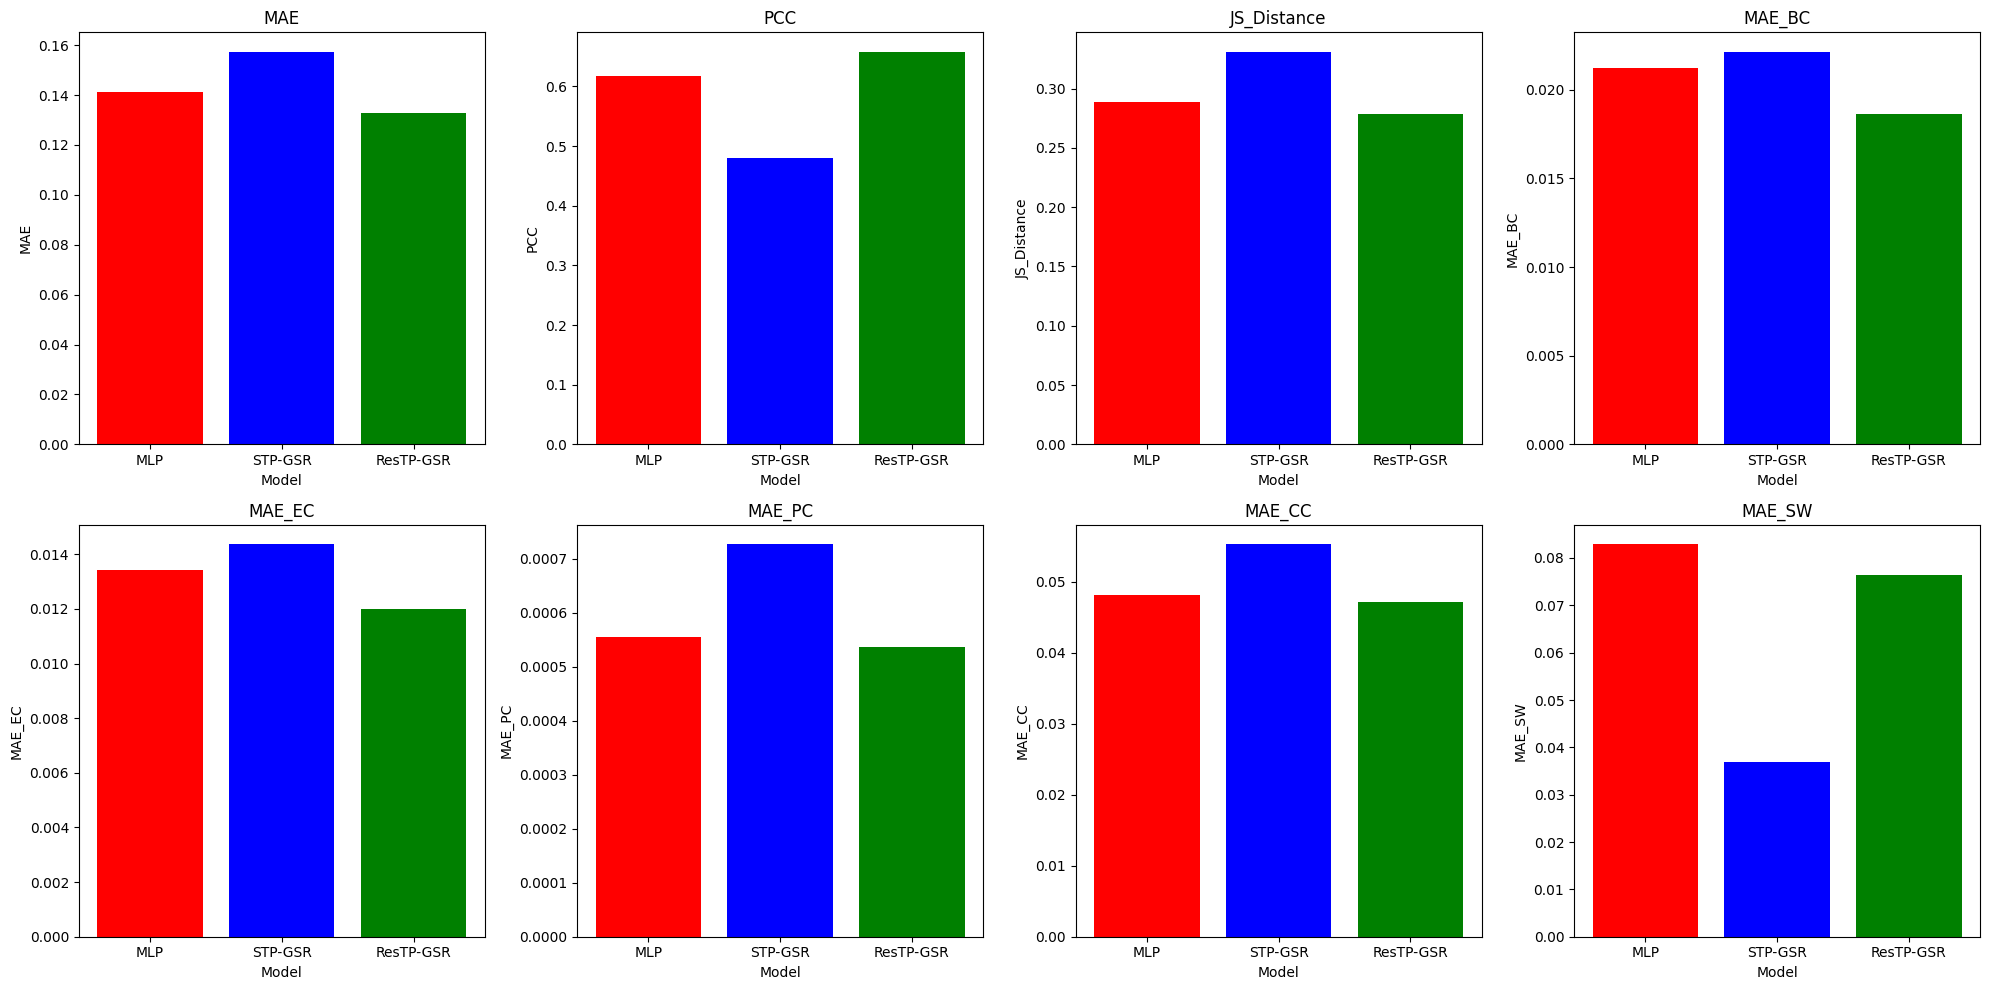

In [19]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
# Plotting the comparison bar charts for each column
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(df_average_mlp.columns):
    axes[i].bar(['MLP', 'STP-GSR', 'ResTP-GSR'], 
                [df_average_mlp[column].values[0], df_average_stp_gsr[column].values[0], df_average_soap[column].values[0]], 
                color=colors[:3])
    axes[i].set_title(column)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Model')

plt.tight_layout()
plt.show()

In [23]:
df_average_mlp

,MAE,PCC,JS_Distance,MAE_BC,MAE_EC,MAE_PC,MAE_CC,MAE_SW
0,0.141305,0.617683,0.289015,0.021205,0.013425,0.000555,0.048047,0.082883


In [24]:
df_average_soap

,MAE,PCC,JS_Distance,MAE_BC,MAE_EC,MAE_PC,MAE_CC,MAE_SW
0,0.132858,0.657745,0.278226,0.018636,0.012002,0.000536,0.047124,0.076496


In [25]:
df_average_stp_gsr

,MAE,PCC,JS_Distance,MAE_BC,MAE_EC,MAE_PC,MAE_CC,MAE_SW
0,0.157285,0.480815,0.330868,0.022134,0.014363,0.000726,0.055238,0.036974
